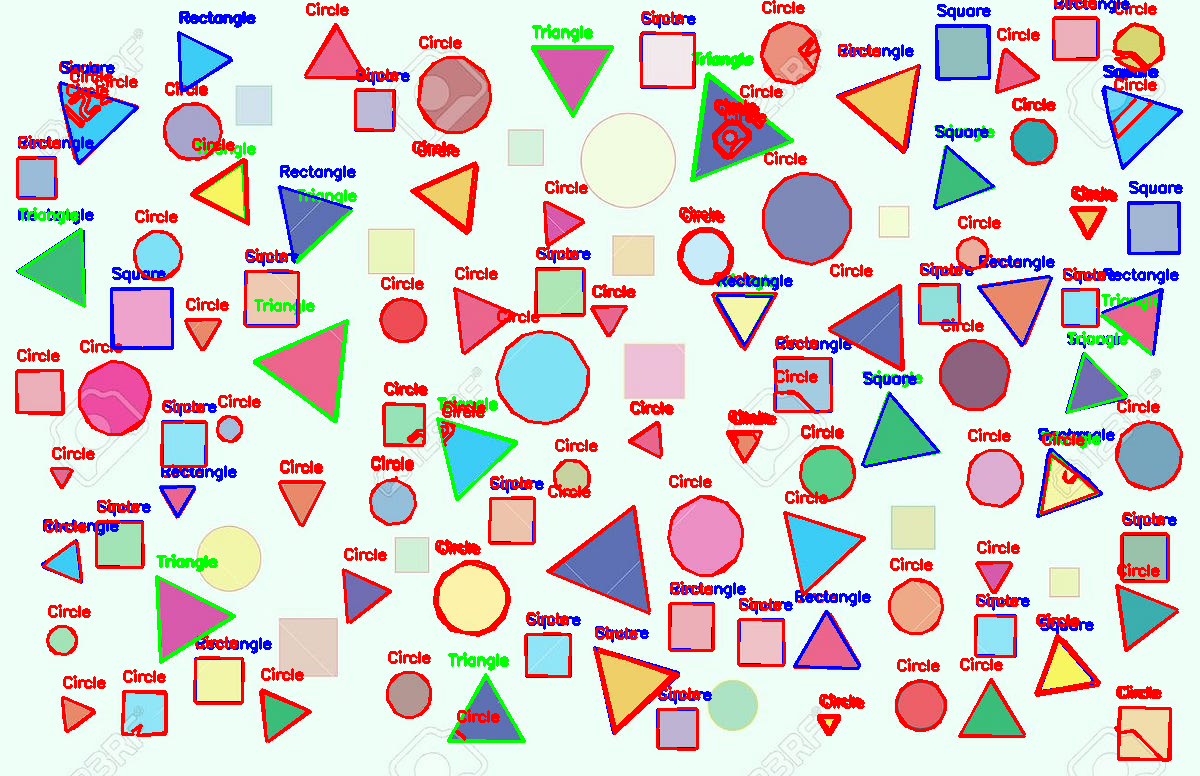

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image
image_path = '/content/img.jpg'
img = cv2.imread(image_path)
if img is None:
    raise ValueError(f"Image not found at path: {image_path}")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help contour detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, 50, 150)

# Find contours with hierarchy
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Function to draw shapes based on contour properties
def draw_shapes(img, contours):
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Draw different shapes based on the number of vertices
        x, y, w, h = cv2.boundingRect(approx)
        if len(approx) == 3:
            cv2.putText(img, 'Triangle', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)
        elif len(approx) == 4:
            aspect_ratio = float(w) / h
            if 0.95 <= aspect_ratio <= 1.05:
                cv2.putText(img, 'Square', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
                cv2.drawContours(img, [approx], -1, (255, 0, 0), 2)
            else:
                cv2.putText(img, 'Rectangle', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
                cv2.drawContours(img, [approx], -1, (255, 0, 0), 2)
        elif len(approx) > 4:
            cv2.putText(img, 'Circle', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            cv2.drawContours(img, [approx], -1, (0, 0, 255), 2)

# Draw the detected shapes on the image
result_img = img.copy()
draw_shapes(result_img, contours)

# Display the result
cv2_imshow(result_img)
